<a href="https://colab.research.google.com/github/jdblackstar/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/132A_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def sum(list):
  s = 0
  for i in range(len(list)):
    s += list[i]
    i += 1
  return s

In [0]:
def mean(list):
  return sum(list)/len(list)

In [0]:
def var(list):
  n = len(list)
  dist = []
  for i in range(n):
    dist.append((list[i]-mean(list))**2)
  var = sum(dist) / (n - 1)
  return var

In [0]:
def std(list):
  std = np.sqrt(var(list))
  return std

In [0]:
def cov_corr(x, y):

# This is the covariance and correlation function for 1.2
# Put it here to keep all functions together

  if type(x) == list and type(y) == list:
    x_list = x
    y_list = y
  else:
    x_list = x.tolist()
    y_list = y.tolist()
  n = len(x)
  x_mean = mean(x_list)
  y_mean = mean(y_list)
  numerator = []
  for i in range(n):
    x_std = (x_list[i]-x_mean)
    y_std = (y_list[i]-y_mean)
    numerator.append(x_std * y_std)
  numerator = sum(numerator)
  cov = numerator / (n-1)
  corr = cov / (std(x_list)*std(y_list))
  return cov, corr

In [0]:
# do mean, var and std in one function instead (i know i used sum, oops)

def trifecta(list):
  return mean(list), var(list), std(list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [11]:
trifecta(sales)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
traffic = [127, 80, 105, 92, 120, 115, 93]

In [0]:
d = {'sales': sales, 'customers': traffic}

In [14]:
df = pd.DataFrame(d)
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [0]:
r, f = cov_corr(sales,cust)
print(r)
f

In [0]:
# find the coviariance using df.cov()
df.cov()

In [0]:
# check correlation coefficient
df.corr()

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
m_cust, v_cust, s_cust = mean_var_std_oflist(df['customers'].tolist())
print(m_cust)
print(v_cust)
s_cust

In [0]:
m_sales, v_sales, s_sales = mean_var_std_oflist(df['sales'].tolist())
print(m_sales)
print(v_sales)
s_sales

In [0]:
df.head()

In [0]:
cov_corr(df['customers'].tolist(), df['sales'].tolist())

In [0]:
# check with pandas
df.cov()

In [0]:
# The correlation coefficient is 0.962834
df.corr()

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [16]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [17]:
df.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'has_cabin_number'],
      dtype='object')

In [18]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [19]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [20]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
i_hat = np.array([[1,
                   0]])
j_hat = np.array([[0,
                  1]])

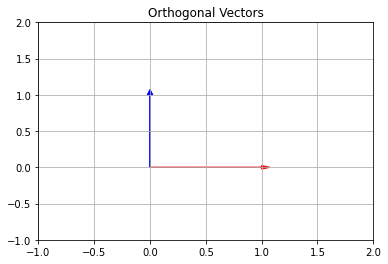

In [22]:
plt.arrow(0, 0, i_hat[0][0], i_hat[0][1], color='red', head_width=.05)  # i_hat
plt.arrow(0, 0, j_hat[0][0], j_hat[0][1], color='blue', head_width=.05) # j_hat
plt.ylim(-1,2)
plt.xlim(-1,2)
plt.grid()
plt.title('Orthogonal Vectors')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [23]:
# dot product = 0; orthogonal
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

-40

In [0]:
# they are not orthogonal because their dot products doesn't equal zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [28]:
c = [2, -15, 6, 20]
c_array = np.array(c)
np.linalg.norm(c)**2

665.0

In [29]:
np.dot(c, c)

665

In [30]:
np.matmul(c_array.T, c_array)

665

In [31]:
# These numbers represent the summation, or the squares of each element added together
summation = 2**2 + (-15)**2 + 6**2 + 20**2
summation

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [33]:
f = np.array([[4, 
               12, 
               11, 
               9, 
               2]])

f_unit = f / np.linalg.norm(f)
print(np.linalg.norm(f))
print(f_unit)

magnitude = np.sqrt(f[0][0]**2 + f[0][1]**2 + f[0][2]**2 + f[0][3]**2 + f[0][4]**2)
print(magnitude)
f_unit_mag = f / magnitude
f_unit_mag

19.131126469708992
[[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]]
19.131126469708992


array([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

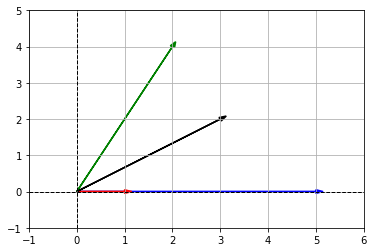

In [35]:
v1 = [1, 0]
v2 = [5, 0]
v3 = [2, 4]
v4 = [3, 2]

plt.arrow(0, 0, v2[0], v2[1], lw=1.5, head_width=.1, color='blue')
plt.arrow(0, 0, v1[0], v1[1], lw=1.5, head_width=.1, color='red')
plt.arrow(0, 0, v3[0], v3[1], lw=1.5, head_width=.1, color='green')
plt.arrow(0, 0, v4[0], v4[1], lw=1.5, head_width=.1, color='black')
plt.xlim(-1,6)
plt.ylim(-1,5)
plt.grid()
plt.axhline(0, color='k', ls = '--', lw=1)
plt.axvline(0, color='k', ls='--', lw=1)
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [37]:
g = np.array([[1,
               2]])
h = np.array([[4,
               8]])

print(4*g)
h

[[4 8]]


array([[4, 8]])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([[1,
               2,
               3]])
m = np.array([[-1,
               0,
               7]])
n = np.array([[4,
               8,
               2]])

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



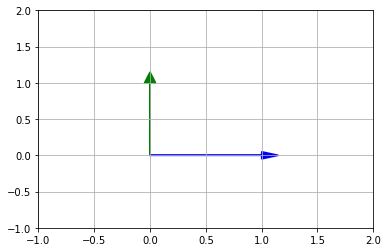

In [40]:
i_hat = [1, 0]
j_hat = [0, 1]

plt.arrow(0, 0, i_hat[0], i_hat[1], lw=1.5, head_width=.1, color='blue')
plt.arrow(0, 0, j_hat[0], j_hat[1], lw=1.5, head_width=.1, color='green')
plt.ylim(-1,2)
plt.xlim(-1,2)
plt.grid()
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.